In [2]:
import pandas as pd
import numpy as np
import datetime 
import itertools 
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [48]:
#read data
data1 = pd.read_csv('dual_tariffs.csv')
data2 = pd.read_csv('elec_gas_tariffs.csv')
data2 = data2[data2['EnergyType']==2]

data = pd.concat([data1,data2])
data = data[['MeterType','SupplierName','OnSaleStartDate','OnSaleEndDate','UnitRate1Elec','UnitRateE7Elec','StandingChargeElec','MonthlyFee']]
data.reset_index(inplace=True)
del data['index']

In [50]:
data.tail()

,MeterType,SupplierName,OnSaleStartDate,OnSaleEndDate,UnitRate1Elec,UnitRateE7Elec,StandingChargeElec,MonthlyFee
876110,STD,Co-operative Energy,2019-03-28T00:00:00.000Z,2019-05-28T00:00:00.000Z,0.173565,NaN,0.273288,NaN
876111,STD,Co-operative Energy,2019-02-22T00:00:00.000Z,NaN,0.196350,NaN,0.301911,NaN
876112,E7,Co-operative Energy,2019-04-02T00:00:00.000Z,2019-05-28T00:00:00.000Z,0.180864,0.136239,0.269174,NaN
876113,STD,Co-operative Energy,2019-04-02T00:00:00.000Z,2019-05-28T00:00:00.000Z,0.172410,NaN,0.404782,NaN
876114,E7,Co-operative Energy,2019-06-13T00:00:00.000Z,NaN,0.174195,0.124425,0.236293,NaN


In [51]:
#impute missing values
data.loc[(np.isnan(data['StandingChargeElec'])==True)&
    (np.isnan(data['UnitRate1Elec'])==False),'StandingChargeElec']=0
data.loc[pd.isnull(data['OnSaleEndDate']), 'OnSaleEndDate'] = pd.to_datetime('today') + datetime.timedelta(days=1)
data.loc[(np.isnan(data['MonthlyFee'])==True),'MonthlyFee']=0

#convert 'OnSaleStartDate' and 'OnSaleEndDate' into datetime 
data['OnSaleStartDate'] = pd.to_datetime(data['OnSaleStartDate'])
data['OnSaleEndDate'] = pd.to_datetime(data['OnSaleEndDate'])
data['OnSaleStartDate'] = data['OnSaleStartDate'].map(lambda x: x.strftime('%Y-%m-%d'))
data['OnSaleEndDate'] = data['OnSaleEndDate'].map(lambda x:x.strftime('%Y-%m-%d'))

#Standard tariffs
std = data.loc[data.MeterType=='STD',:]
#Economy 7 tariffs
e7 = data.loc[data.MeterType=='E7',:]

### create new dataframe for standard tariffs

In [22]:
#create new dataframe for standard tariffs
std_list = []
usage_nums = {'low':2500,'med':4200,'hig':7100}
for supplier in std['SupplierName'].unique():
    startTime = datetime.datetime.now()
    single_supp = std.loc[std['SupplierName']==supplier,:]
    time_index = pd.date_range(min(pd.to_datetime(std['OnSaleStartDate'])),
                          periods=(pd.to_datetime('today')
                                  -min(pd.to_datetime(std['OnSaleEndDate']))).days,freq='D')
    supp_df = pd.DataFrame(columns = ['date','supplier','usage'],data = list(itertools.product(time_index,
                                                                                              [supplier],
                                                                                              ['low','med','hig'])))
    supp_df['yearly_cost'] = np.empty((len(supp_df),0)).tolist()
    
    for rowidx,usage in itertools.product(single_supp.index.values,['low','med','hig']):
        start_date = single_supp.loc[rowidx,'OnSaleStartDate']
        end_date = single_supp.loc[rowidx,'OnSaleEndDate']
        supp_df.loc[((supp_df['date']>=start_date)&(supp_df['date']<=end_date)&(supp_df['usage']==usage)),
                   'yearly_cost'].apply(lambda i: i.append(((single_supp.loc[rowidx,'UnitRate1Elec'])*usage_nums[usage]+
                                                           (single_supp.loc[rowidx,'StandingChargeElec'])*365+
                                                           (single_supp.loc[rowidx,'MonthlyFee'])*12)))    
        
    std_list.append(supp_df)
    print(datetime.datetime.now()-startTime)
time_std = pd.concat(std_list)

0:13:23.377750
0:10:24.808350
0:05:35.062389
0:01:23.498460
0:05:53.247724
0:00:57.168331
0:03:07.244185
0:00:31.897259
0:00:31.536096
0:01:01.037142
0:00:22.329724
0:00:46.153915
0:00:15.880150
0:00:09.929531
0:00:32.149689
0:00:10.685474
0:00:10.495386
0:00:12.785475
0:00:33.267958
0:00:11.818760
0:00:09.402198
0:01:24.322060
0:01:42.071951
0:02:13.630857
0:02:16.721325
0:03:36.574140
0:03:36.352482
0:04:47.453703
0:02:17.360240
0:02:19.678115
0:00:49.697954
0:02:39.338375
0:00:31.566025
0:00:26.394720
0:00:41.599615
0:00:20.606375
0:00:39.121582
0:00:32.262907
0:01:20.021385
0:00:48.097740
0:02:00.853120
0:00:42.535515
0:01:03.536272
0:00:15.758450
0:00:22.533841
0:00:15.127034
0:00:15.753443
0:00:07.754462
0:00:15.096282
0:00:14.289743
0:00:18.122876
0:00:19.401100
0:00:25.162128
0:00:46.180160
0:00:15.131464
0:00:09.638792
0:00:08.272311
0:00:07.557523
0:00:10.034628
0:00:06.312106
0:12:48.597813
0:08:25.257713
0:01:59.191963
0:07:26.486430
0:03:38.242749
0:01:45.394173
0:00:48.24

In [23]:
#calculate the mean, median and sum value of yearly cost
std_cost_mean = time_std['yearly_cost'].apply(np.mean)
std_cost_median = time_std['yearly_cost'].apply(np.median)
std_cost_sum = time_std['yearly_cost'].apply(np.sum)

time_std['cost_mean']=std_cost_mean
time_std['cost_median'] = std_cost_median
time_std['cost_sum'] = std_cost_sum

In [25]:
#save the dataframe into csv
time_std.to_csv('time_std.csv')

In [26]:
time_std.head()

,date,supplier,usage,yearly_cost,cost_mean,cost_median,cost_sum
0,2004-05-06,E.ON,low,[],NaN,NaN,0.0
1,2004-05-06,E.ON,med,[],NaN,NaN,0.0
2,2004-05-06,E.ON,hig,[],NaN,NaN,0.0
3,2004-05-07,E.ON,low,[],NaN,NaN,0.0
4,2004-05-07,E.ON,med,[],NaN,NaN,0.0


In [27]:
time_std.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1701648 entries, 0 to 15755
Data columns (total 7 columns):
date           datetime64[ns]
supplier       object
usage          object
yearly_cost    object
cost_mean      float64
cost_median    float64
cost_sum       float64
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 103.9+ MB


#### plot

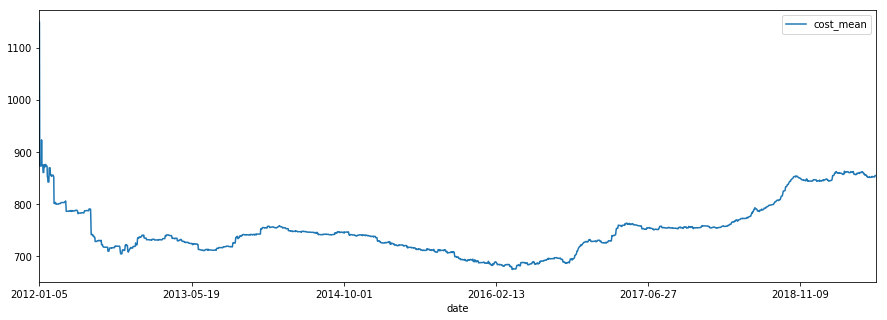

In [3]:
# read the data
std = pd.read_csv('time_std.csv')
# choose the mean value to analysis
std = std[['date','cost_mean']]

std.sort_values('date',inplace=True)

std = std.groupby('date').mean()
#plot the time graph
std[['cost_mean']].plot(figsize=(15,5))

### create dataframe for Economy 7 tariffs 

In [16]:
e7_list = []
usage_nums = {'low':2500,'med':4200,'hig':7100}
for supplier in e7['SupplierName'].unique():
    startTime = datetime.datetime.now()
    single_supp = e7.loc[e7['SupplierName']==supplier,:]
    time_index = pd.date_range(min(pd.to_datetime(e7['OnSaleStartDate'])),
                          periods=(pd.to_datetime('today')
                                  -min(pd.to_datetime(e7['OnSaleEndDate']))).days,freq='D')
    supp_df = pd.DataFrame(columns = ['date','supplier','usage'],data = list(itertools.product(time_index,
                                                                                              [supplier],
                                                                                              ['low','med','hig'])))
    supp_df['yearly_cost'] = np.empty((len(supp_df),0)).tolist()
    
    for rowidx,usage in itertools.product(single_supp.index.values,['low','med','hig']):
        start_date = single_supp.loc[rowidx,'OnSaleStartDate']
        end_date = single_supp.loc[rowidx,'OnSaleEndDate']
        supp_df.loc[((supp_df['date']>=start_date)&(supp_df['date']<=end_date)&(supp_df['usage']==usage)),
                   'yearly_cost'].apply(lambda i: i.append(((0.58*single_supp.loc[rowidx,'UnitRate1Elec'] + 0.42*single_supp.loc[rowidx,'UnitRateE7Elec'])*usage_nums[usage]+
                                                           (single_supp.loc[rowidx,'StandingChargeElec'])*365+
                                                           (single_supp.loc[rowidx,'MonthlyFee'])*12)))
    
        
    e7_list.append(supp_df)
    print(datetime.datetime.now()-startTime)
    
time_e7 = pd.concat(e7_list)

0:08:31.199115
0:11:51.909370
0:08:15.268382
0:01:09.327448
0:02:56.417585
0:00:38.779289
0:01:52.468816
0:00:03.419099
0:00:30.936933
0:00:35.519600
0:00:23.694215
0:00:45.127766
0:00:16.193145
0:00:15.991481
0:00:38.720330
0:00:19.193888
0:00:23.393895
0:00:17.117038
0:00:10.635558
0:00:10.630910
0:02:01.463791
0:01:38.381189
0:01:36.837787
0:01:08.449640
0:01:58.214977
0:02:22.703241
0:02:50.957919
0:01:28.494573
0:01:13.081340
0:02:28.102829
0:00:28.156125
0:00:32.570085
0:00:38.327445
0:00:18.581652
0:00:25.126623
0:00:19.491785
0:01:13.196119
0:00:53.882416
0:01:37.002938
0:00:49.845760
0:00:54.325207
0:00:17.861970
0:00:15.681948
0:00:15.860120
0:00:11.235912
0:00:07.838785
0:00:16.444357
0:00:12.444873
0:00:09.436696
0:00:19.278363
0:00:15.704580
0:00:32.240844
0:00:17.016147
0:00:08.980824
0:00:06.285404
0:11:46.787304
0:05:35.387266
0:01:49.531686
0:04:47.880561
0:02:17.426884
0:01:32.002844
0:00:44.345785
0:00:45.818567
0:01:02.354957
0:01:18.211378
0:00:28.042278
0:00:52.87

In [18]:
time_e7.tail()

,date,supplier,usage,yearly_cost
8239,2019-07-13,Symbio Energy,med,"[524.918, 629.3068, 534.4939999999999, 549.000..."
8240,2019-07-13,Symbio Energy,hig,"[862.159, 1013.4233999999999, 878.346999999999..."
8241,2019-07-14,Symbio Energy,low,"[327.225, 404.135, 332.92499999999995, 341.56,..."
8242,2019-07-14,Symbio Energy,med,"[524.918, 629.3068, 534.4939999999999, 549.000..."
8243,2019-07-14,Symbio Energy,hig,"[862.159, 1013.4233999999999, 878.346999999999..."


In [19]:
# calculate mean, median and sum value for the yearly cost
e7_cost_mean = time_e7['yearly_cost'].apply(np.mean)
e7_cost_median = time_e7['yearly_cost'].apply(np.median)
e7_cost_sum = time_e7['yearly_cost'].apply(np.sum)

time_e7['cost_mean']=e7_cost_mean
time_e7['cost_median'] = e7_cost_median
time_e7['cost_sum'] = e7_cost_sum

In [20]:
# save the dataframe into csv
time_e7.to_csv('time_e7.csv')

#### plot

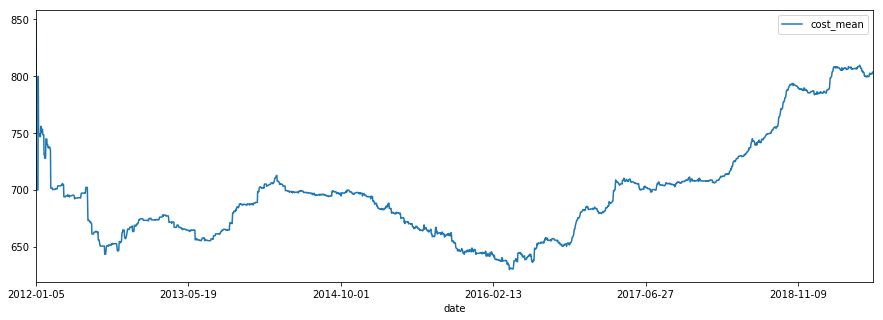

In [21]:
# read the data
e7 = pd.read_csv('time_e7.csv')
# choose the mean value to analysis
e7 = e7[['date','cost_mean']]

e7.sort_values('date',inplace=True)

e7 = e7.groupby('date').mean()
#plot the time graph
e7[['cost_mean']].plot(figsize=(15,5))

### create dataframe for E7 with the split of 0.72/0.28

In [7]:
#create dataframe for E7 with the split of 0.72/0.28
e7_list = []
usage_nums = {'low':2500,'med':4200,'hig':7100}
for supplier in e7['SupplierName'].unique():
    startTime = datetime.datetime.now()
    single_supp = e7.loc[e7['SupplierName']==supplier,:]
    time_index = pd.date_range(min(pd.to_datetime(e7['OnSaleStartDate'])),
                          periods=(pd.to_datetime('today')
                                  -min(pd.to_datetime(e7['OnSaleEndDate']))).days,freq='D')
    supp_df = pd.DataFrame(columns = ['date','supplier','usage'],data = list(itertools.product(time_index,
                                                                                              [supplier],
                                                                                              ['low','med','hig'])))
    supp_df['yearly_cost'] = np.empty((len(supp_df),0)).tolist()
    
    for rowidx,usage in itertools.product(single_supp.index.values,['low','med','hig']):
        start_date = single_supp.loc[rowidx,'OnSaleStartDate']
        end_date = single_supp.loc[rowidx,'OnSaleEndDate']
        supp_df.loc[((supp_df['date']>=start_date)&(supp_df['date']<=end_date)&(supp_df['usage']==usage)),
                   'yearly_cost'].apply(lambda i: i.append(((0.72*single_supp.loc[rowidx,'UnitRate1Elec'] + 0.28*single_supp.loc[rowidx,'UnitRateE7Elec'])*usage_nums[usage]+
                                                           (single_supp.loc[rowidx,'StandingChargeElec'])*365+
                                                           (single_supp.loc[rowidx,'MonthlyFee'])*12)))     
    e7_list.append(supp_df)
    print(datetime.datetime.now()-startTime)   
time_e7_72 = pd.concat(e7_list)

0:18:17.864545
0:18:47.807133
0:10:17.029214
0:02:24.096589
0:06:03.225098
0:01:19.743249
0:03:55.445245
0:00:06.834687
0:01:04.475966
0:01:14.968096
0:00:49.205216
0:01:38.526864
0:00:28.394830
0:00:26.070038
0:01:04.623556
0:00:18.833918
0:00:28.699569
0:00:22.855784
0:00:19.651473
0:00:08.542909
0:02:46.001172
0:02:32.910550
0:02:30.160998
0:01:44.942852
0:03:05.738328
0:03:40.494916
0:04:35.924871
0:02:14.774151
0:01:52.271424
0:03:40.075548
0:00:38.743734
0:00:47.758286
0:00:53.737880
0:00:26.357870
0:00:35.199492
0:00:28.201548
0:01:49.931629
0:01:23.840913
0:02:36.798516
0:01:18.890357
0:01:28.648979
0:00:28.318681
0:00:24.429878
0:00:23.575444
0:00:17.960295
0:00:12.393338
0:00:26.082477
0:00:20.893696
0:00:14.806556
0:00:24.568800
0:00:24.715373
0:00:53.127420
0:00:21.520521
0:00:12.484003
0:00:08.361980
0:15:52.092137
0:07:43.278857
0:02:28.549642
0:07:36.172162
0:03:49.968603
0:02:33.427574
0:01:02.731700
0:01:02.608442
0:00:57.599775
0:01:46.719939
0:00:36.958318
0:01:12.08

In [8]:
#calculate the mean,median and sum value for yearly cost
e7_cost_mean = time_e7_72['yearly_cost'].apply(np.mean)
e7_cost_median = time_e7_72['yearly_cost'].apply(np.median)
e7_cost_sum = time_e7_72['yearly_cost'].apply(np.sum)

time_e7_72['cost_mean']=e7_cost_mean
time_e7_72['cost_median'] = e7_cost_median
time_e7_72['cost_sum'] = e7_cost_sum

In [10]:
#save the dataframe into csv
time_e7_72.to_csv('time_e7_72.csv')

In [11]:
time_e7_72.tail()

,date,supplier,usage,yearly_cost,cost_mean,cost_median,cost_sum
8245,2019-07-15,Symbio Energy,med,"[554.612, 668.2912, 573.596, 582.9872, 599.636...",616.383375,601.19000,25888.101770
8246,2019-07-15,Symbio Energy,hig,"[912.356, 1079.3256000000001, 944.448, 960.323...",1010.002419,991.09500,42420.101610
8247,2019-07-16,Symbio Energy,low,"[344.9, 427.34, 356.2, 361.79, 371.7, 345.062,...",389.350643,385.91500,21803.635998
8248,2019-07-16,Symbio Energy,med,"[554.612, 668.2912, 573.596, 582.9872, 599.636...",619.319721,612.80544,34681.904398
8249,2019-07-16,Symbio Energy,hig,"[912.356, 1079.3256000000001, 944.448, 960.323...",1011.619914,1000.41260,56650.715198


#### plot

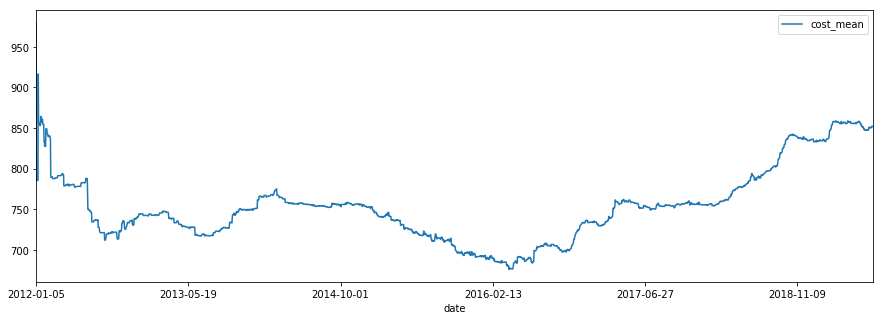

In [4]:
# read the data
e7 = pd.read_csv('time_e7_72.csv')
# choose the mean value to analysis
e7 = e7[['date','cost_mean']]

e7.sort_values('date',inplace=True)

e7 = e7.groupby('date').mean()
#plot the time graph
e7[['cost_mean']].plot(figsize=(15,5))

### create dataframe for E7 with the split of 0.75/0.25

In [8]:
e7_list = []
usage_nums = {'low':2500,'med':4200,'hig':7100}
for supplier in e7['SupplierName'].unique():
    startTime = datetime.datetime.now()
    single_supp = e7.loc[e7['SupplierName']==supplier,:]
    time_index = pd.date_range(min(pd.to_datetime(e7['OnSaleStartDate'])),
                          periods=(pd.to_datetime('today')
                                  -min(pd.to_datetime(e7['OnSaleEndDate']))).days,freq='D')
    supp_df = pd.DataFrame(columns = ['date','supplier','usage'],data = list(itertools.product(time_index,
                                                                                              [supplier],
                                                                                              ['low','med','hig'])))
    supp_df['yearly_cost'] = np.empty((len(supp_df),0)).tolist()
    
    for rowidx,usage in itertools.product(single_supp.index.values,['low','med','hig']):
        start_date = single_supp.loc[rowidx,'OnSaleStartDate']
        end_date = single_supp.loc[rowidx,'OnSaleEndDate']
        supp_df.loc[((supp_df['date']>=start_date)&(supp_df['date']<=end_date)&(supp_df['usage']==usage)),
                   'yearly_cost'].apply(lambda i: i.append(((0.75*single_supp.loc[rowidx,'UnitRate1Elec'] + 0.25*single_supp.loc[rowidx,'UnitRateE7Elec'])*usage_nums[usage]+
                                                           (single_supp.loc[rowidx,'StandingChargeElec'])*365+
                                                           (single_supp.loc[rowidx,'MonthlyFee'])*12)))        
    e7_list.append(supp_df)
    print(datetime.datetime.now()-startTime)    
time_e7_75 = pd.concat(e7_list)

0:10:02.522044
0:10:06.943140
0:07:15.544347
0:01:34.003609
0:03:50.444937
0:00:40.833246
0:02:14.115985
0:00:03.247713
0:00:40.295044
0:00:37.217912
0:00:24.204571
0:00:58.379655
0:00:15.190843
0:00:13.062656
0:00:40.020547
0:00:10.667460
0:00:17.632222
0:00:11.349456
0:00:19.206231
0:00:06.625212
0:01:48.935332
0:01:58.433428
0:01:40.769825
0:01:18.187107
0:01:54.709230
0:03:42.409066
0:05:59.426305
0:03:12.956636
0:02:29.205716
0:05:01.005722
0:01:14.637929
0:01:24.342934
0:01:14.598605
0:01:04.712632
0:01:33.415867
0:01:09.045415
0:04:21.767003
0:03:46.805779
0:08:05.774005
0:03:35.408367
0:03:33.000707
0:01:09.856139
0:00:46.524031
0:00:42.172003
0:00:43.928764
0:00:22.427846
0:00:50.854501
0:00:36.938953
0:00:28.854109
0:01:05.419032
0:00:48.671612
0:01:40.501746
0:00:41.970342
0:00:32.198607
0:00:25.930535
0:28:14.762652
0:19:53.920277
0:05:46.258019
0:21:42.994704
0:04:49.750079
0:01:38.659019
0:00:35.765045
0:00:42.110640
0:00:32.950873
0:01:06.794381
0:00:22.642085
0:00:42.46

In [9]:
#calculate the mean, median and sum value for the yearly cost
e7_cost_mean = time_e7_75['yearly_cost'].apply(np.mean)
e7_cost_median = time_e7_75['yearly_cost'].apply(np.median)
e7_cost_sum = time_e7_75['yearly_cost'].apply(np.sum)

time_e7_75['cost_mean']=e7_cost_mean
time_e7_75['cost_median'] = e7_cost_median
time_e7_75['cost_sum'] = e7_cost_sum

In [10]:
#save the dataframe into csv
time_e7_75.to_csv('time_e7_75.csv')

In [11]:
time_e7_75.head()

,date,supplier,usage,yearly_cost,cost_mean,cost_median,cost_sum
0,2012-01-05,E.ON,low,"[605.3937500000001, 525.7312499999999, 517.987...",548.223992,550.1375,50984.83125
1,2012-01-05,E.ON,med,"[1017.0615000000001, 883.2284999999999, 870.21...",921.016306,924.2310,85654.51650
2,2012-01-05,E.ON,hig,"[1719.3182500000003, 1493.07675, 1471.0845, 13...",1556.956137,1562.3905,144796.92075
3,2012-01-06,E.ON,low,"[605.3937500000001, 525.7312499999999, 517.987...",548.223992,550.1375,50984.83125
4,2012-01-06,E.ON,med,"[1017.0615000000001, 883.2284999999999, 870.21...",921.016306,924.2310,85654.51650


#### plot

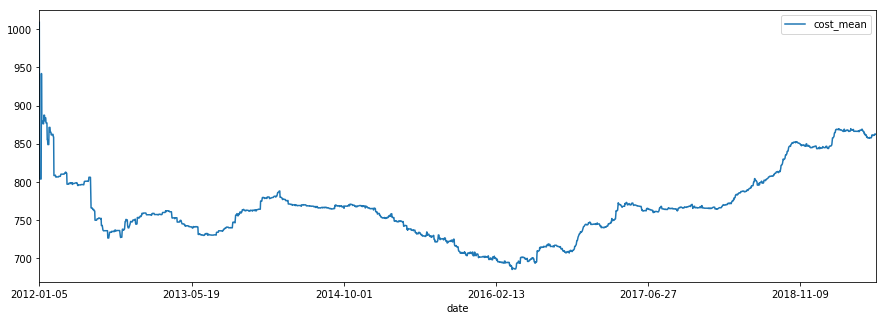

In [14]:
# read the data
e7 = pd.read_csv('time_e7_75.csv')
# choose the mean value to analysis
e7 = e7[['date','cost_mean']]

e7.sort_values('date',inplace=True)

e7 = e7.groupby('date').mean()
#plot the time graph
e7[['cost_mean']].plot(figsize=(15,5))

### create dataframe for E7 with the split of 0.8/0.2

In [21]:
#create dataframe for E7 with the split of 0.8/0.2
e7_list = []
usage_nums = {'low':2500,'med':4200,'hig':7100}
for supplier in e7['SupplierName'].unique():
    startTime = datetime.datetime.now()
    single_supp = e7.loc[e7['SupplierName']==supplier,:]
    time_index = pd.date_range(min(pd.to_datetime(e7['OnSaleStartDate'])),
                          periods=(pd.to_datetime('today')
                                  -min(pd.to_datetime(e7['OnSaleEndDate']))).days,freq='D')
    supp_df = pd.DataFrame(columns = ['date','supplier','usage'],data = list(itertools.product(time_index,
                                                                                              [supplier],
                                                                                              ['low','med','hig'])))
    supp_df['yearly_cost'] = np.empty((len(supp_df),0)).tolist()
    
    for rowidx,usage in itertools.product(single_supp.index.values,['low','med','hig']):
        start_date = single_supp.loc[rowidx,'OnSaleStartDate']
        end_date = single_supp.loc[rowidx,'OnSaleEndDate']
        supp_df.loc[((supp_df['date']>=start_date)&(supp_df['date']<=end_date)&(supp_df['usage']==usage)),
                   'yearly_cost'].apply(lambda i: i.append(((0.80*single_supp.loc[rowidx,'UnitRate1Elec'] + 0.20*single_supp.loc[rowidx,'UnitRateE7Elec'])*usage_nums[usage]+
                                                           (single_supp.loc[rowidx,'StandingChargeElec'])*365+
                                                           (single_supp.loc[rowidx,'MonthlyFee'])*12)))        
    e7_list.append(supp_df)
    print(datetime.datetime.now()-startTime)
time_e7_80 = pd.concat(e7_list)

0:10:53.737097
0:11:37.030660
0:06:28.330619
0:01:21.746663
0:03:49.263148
0:00:51.242576
0:02:03.034751
0:00:03.567469
0:00:32.914575
0:00:39.273236
0:00:24.509572
0:00:50.447701
0:00:14.412688
0:00:13.530272
0:00:34.546175
0:00:09.277579
0:00:14.999287
0:00:14.572227
0:00:10.160189
0:00:04.394736
0:01:25.018206
0:01:22.330028
0:01:17.098887
0:00:53.141241
0:01:36.481117
0:01:52.746405
0:02:20.482179
0:01:08.134401
0:00:55.427270
0:01:51.610202
0:00:19.603333
0:00:24.070316
0:00:27.219703
0:00:13.342188
0:00:16.785230
0:00:13.893042
0:00:56.574831
0:00:45.067246
0:01:21.324631
0:00:40.829100
0:00:45.166399
0:00:14.569825
0:00:12.420203
0:00:12.093399
0:00:09.121020
0:00:06.638194
0:00:13.445226
0:00:10.227904
0:00:07.645505
0:00:13.088240
0:00:13.103188
0:00:27.616749
0:00:10.817121
0:00:06.831405
0:00:04.380478
0:08:28.886675
0:03:43.754993
0:01:08.151237
0:03:36.676051
0:01:56.605803
0:01:39.396363
0:00:43.881815
0:00:33.768596
0:00:30.514685
0:01:04.583734
0:00:18.688395
0:00:34.78

In [23]:
#calculate the mean,median and sum value for the yearly cost
e7_cost_mean = time_e7_80['yearly_cost'].apply(np.mean)
e7_cost_median = time_e7_80['yearly_cost'].apply(np.median)
e7_cost_sum = time_e7_80['yearly_cost'].apply(np.sum)

time_e7_80['cost_mean']=e7_cost_mean
time_e7_80['cost_median'] = e7_cost_median
time_e7_80['cost_sum'] = e7_cost_sum

#save the dataframe into csv
time_e7_80.to_csv('time_e7_80.csv')

#### plot

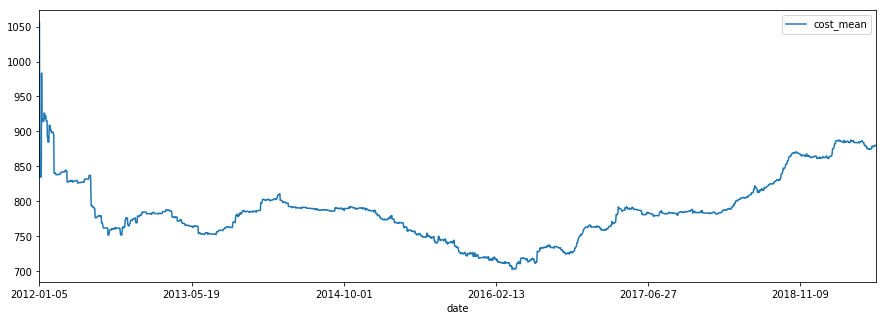

In [26]:
# read the data
e7 = pd.read_csv('time_e7_80.csv')
# choose the mean value to analysis
e7 = e7[['date','cost_mean']]

e7.sort_values('date',inplace=True)

e7 = e7.groupby('date').mean()
#plot the time graph
e7[['cost_mean']].plot(figsize=(15,5))